# Table of contents
## 01. Setting up
## 02. Heatmap
## 03. Scatterplot
## 04. Pair plot
## 05. Catplot
## 06. Answers 6.1
## 07. Hypothesis

# 01. Setting up

In [1]:
#importing libraries
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
#defining path
path = r"C:\\Users\Anwender\Documents\10-2023 Happiness Project\02 Data\Prepared Data"

In [3]:
#importing cleaned df
df = pd.read_pickle(os.path.join(path, "df2015_2019_dropped.pkl"))

In [4]:
df

,Country,Region,Happiness Rank,Happiness Score,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Year
0,Switzerland,Western Europe,1,7.587,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2015
1,Iceland,Western Europe,2,7.561,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2015
2,Denmark,Western Europe,3,7.527,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2015
3,Norway,Western Europe,4,7.522,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2015
4,Canada,North America,5,7.427,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2015
...,...,...,...,...,...,...,...,...,...,...,...
151,Rwanda,Sub-Saharan Africa,152,3.334,0.35900,0.71100,0.61400,0.55500,0.41100,0.21700,2019
152,Tanzania,Sub-Saharan Africa,153,3.231,0.47600,0.88500,0.49900,0.41700,0.14700,0.27600,2019
153,Afghanistan,Southern Asia,154,3.203,0.35000,0.51700,0.36100,0.00000,0.02500,0.15800,2019
154,Central African Republic,Sub-Saharan Africa,155,3.083,0.02600,0.00000,0.10500,0.22500,0.03500,0.23500,2019


# 02. Correlation matrix heatmap

In [7]:
#creating a subset with continuous data
sub = df[["Happiness Rank", "Happiness Score", "Economy (GDP per Capita)", "Family", "Health (Life Expectancy)", "Freedom",
         "Trust (Government Corruption)", "Generosity", "Year"]]

Text(0.5, 1.0, 'Correlation matrix of Happiness')

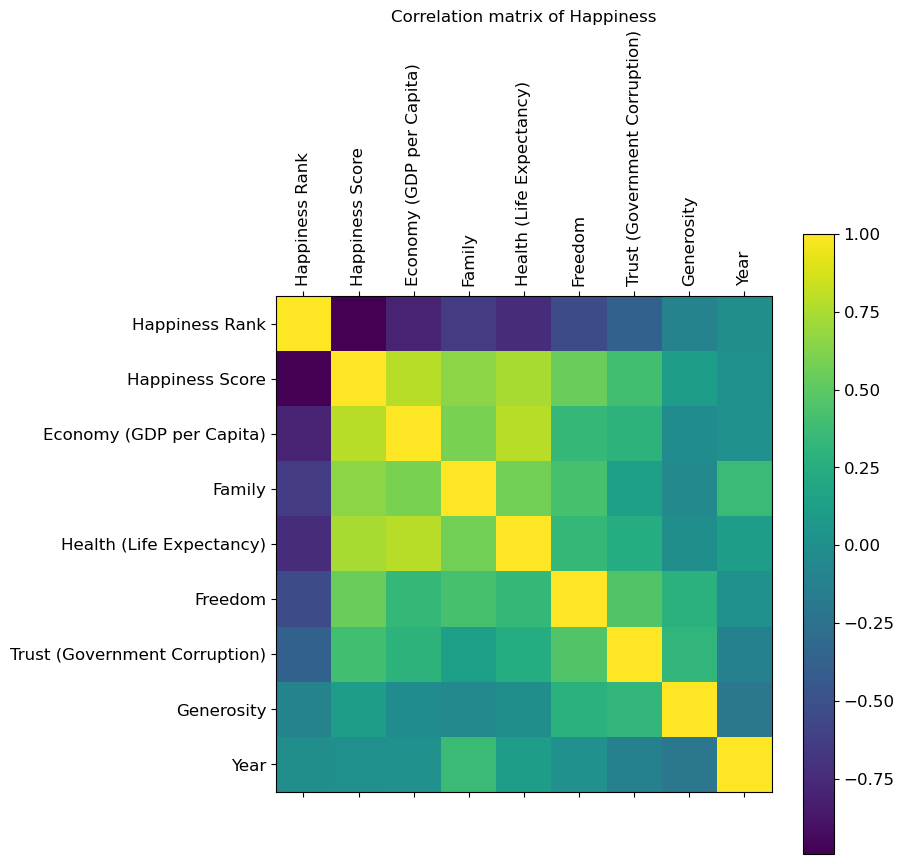

In [16]:
#correlation matrix heatmap version 1

f = plt.figure(figsize = (8,8))
plt.matshow(sub.corr(),fignum = f.number)
plt.xticks(range(sub.shape[1]), sub.columns,fontsize = 12, rotation = 90)
plt.yticks(range(sub.shape[1]), sub.columns,fontsize = 12)
cb= plt.colorbar()
cb.ax.tick_params(labelsize=12)
plt.title("Correlation matrix of Happiness")

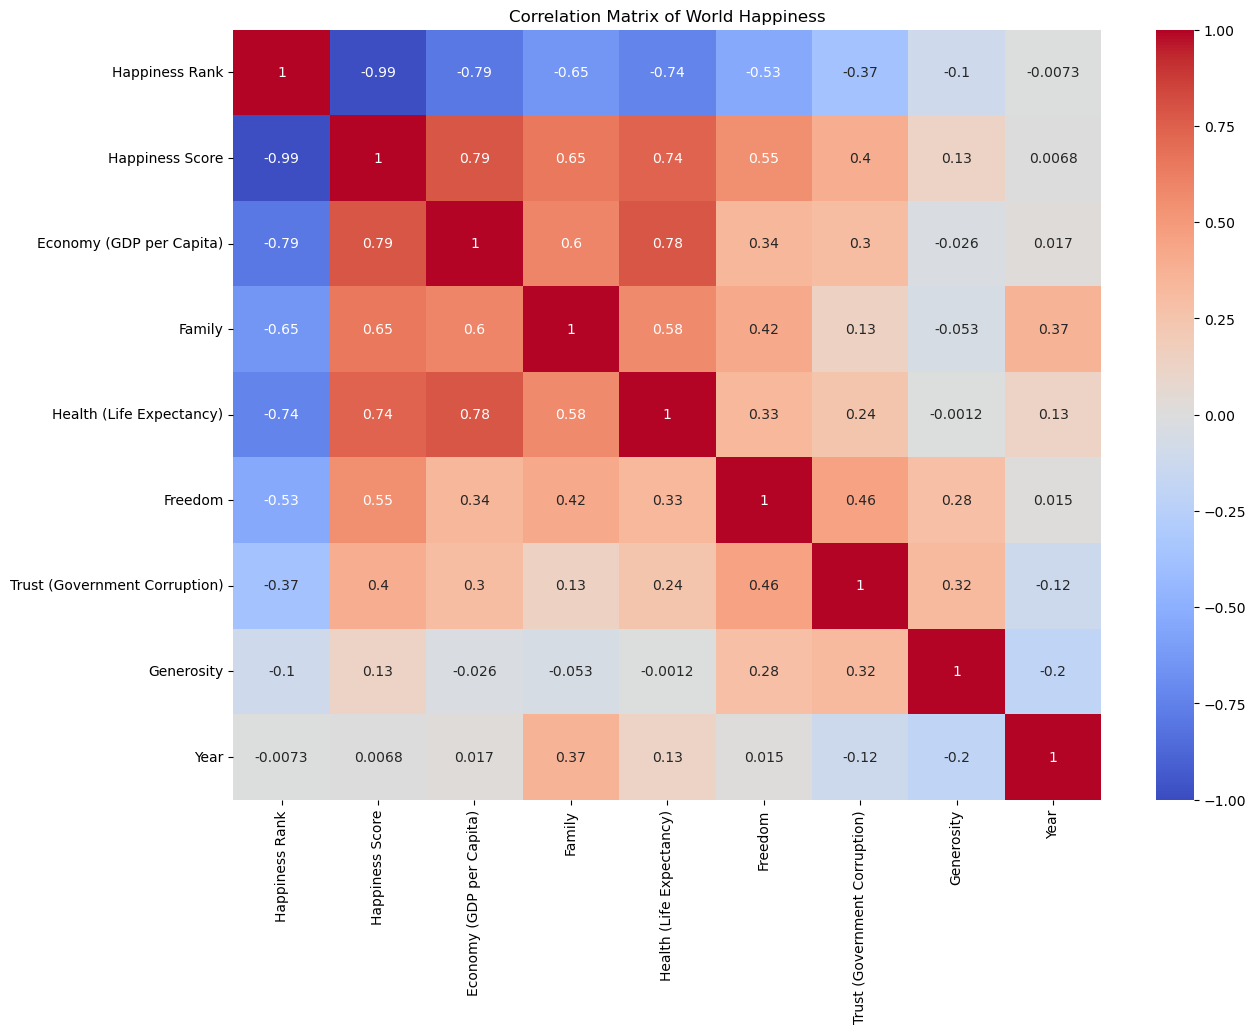

In [27]:
#correlation matrix heatmap version 2

corr = sub.corr()
fig, ax = plt.subplots(figsize = (14, 10))
 
sns.heatmap(ax = ax, 
            data = corr, 
            annot = True, 
            cmap = "coolwarm", 
            vmin = -1, vmax= 1, center = 0)
 
ax.set_title("Correlation Matrix of World Happiness")
 
plt.show()

### Interpretation:

The Happiness score has a strong positive correlation with the Economy, followed by Health, Family and Freedom. 

There is a moderate positive relationship with Trust and a weak positive relationship with Generosity.

There is no relationship to the Year and there is a strong inverse relationship with the Happiness Rank, which makes sense, the higher the score is, the smaller the rank would be.
Other than that, the Happiness Rank has similar relationships to the other factors as the Happiness score.

Economy has a strong positive relationship to Health and Family and a moderate positive one with Freedom and Trust.

Family has a strong positive relationship with Health and a moderate positive relationship with Freedom. Interestingly, it also has a moderate strong relation to Year, whereas none of the other factors are strongly related to the Year. There is a weak positive relation to Trust.

For Health beside the moderate positive relation to Freedom, there are weak positive relationships with Trust and Year.

There are moderate positive relations between Freedom, Trust and Generosity.

# 03. Scatterplot

Text(0.5, 1.0, 'Happiness x Freedom')

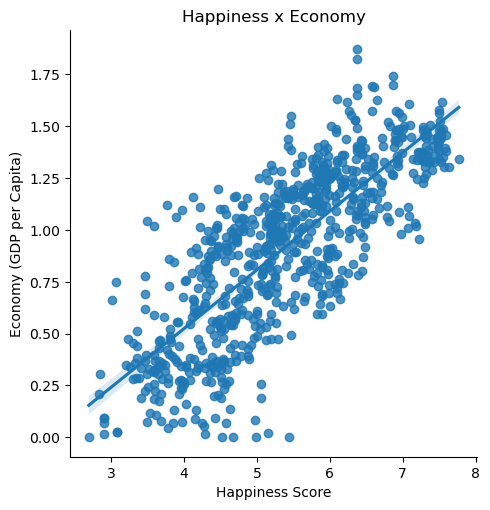

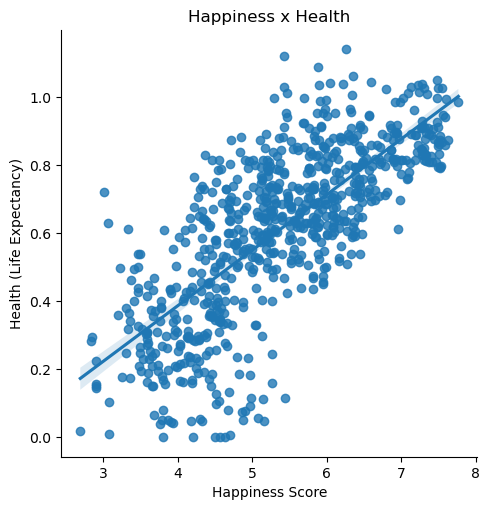

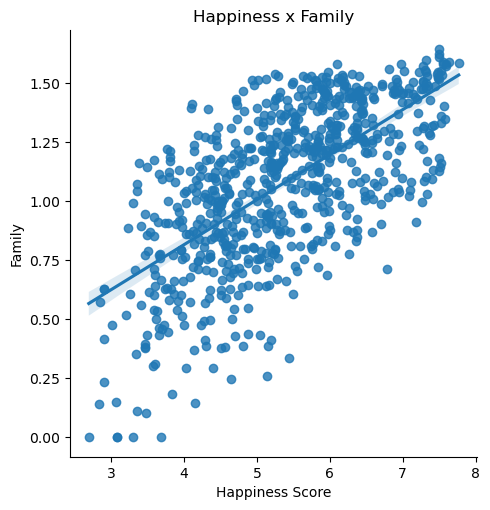

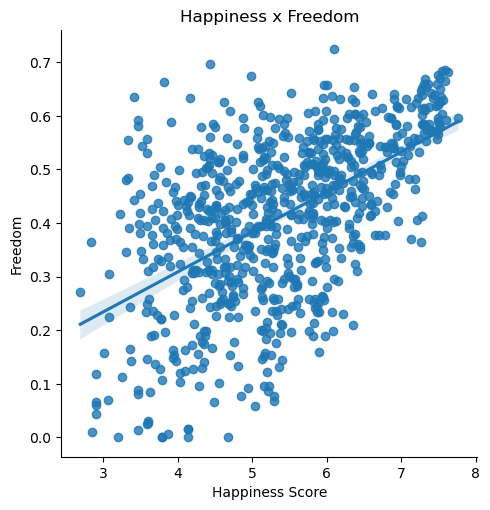

In [40]:
#creating scatterplots for variables with the strongest correlations to Happiness Score:

sns.lmplot(x = "Happiness Score", y = "Economy (GDP per Capita)", data = sub)
plt.title("Happiness x Economy")

sns.lmplot(x = "Happiness Score", y = "Health (Life Expectancy)", data = sub)
plt.title("Happiness x Health")

sns.lmplot(x = "Happiness Score", y = "Family", data = sub)
plt.title("Happiness x Family")

sns.lmplot(x = "Happiness Score", y = "Freedom", data = sub)
plt.title("Happiness x Freedom")

For Happiness and Economy, the survey takers evaluated themselves to be happier tended to have a higher rated Economy a well.There are a few data points straying from the trend line though, as some countries were evaluated to be happier but their Economy was poorly rated.

A similar observation can be made about the Happiness x Health plot.

For Happiness x Freedom, although there is an upward trend, the starting point for Freedom is evalated, which could mean that even though the Freedom is highly rated, it won't necessarily result in a higher Happiness score and vice versa.

A similar observation can be made about Happiness x Family.

In [4]:
# subset with strongly correlated columns:
sub_2 = df[["Happiness Score","Economy (GDP per Capita)", "Health (Life Expectancy)", "Family", "Freedom"]]

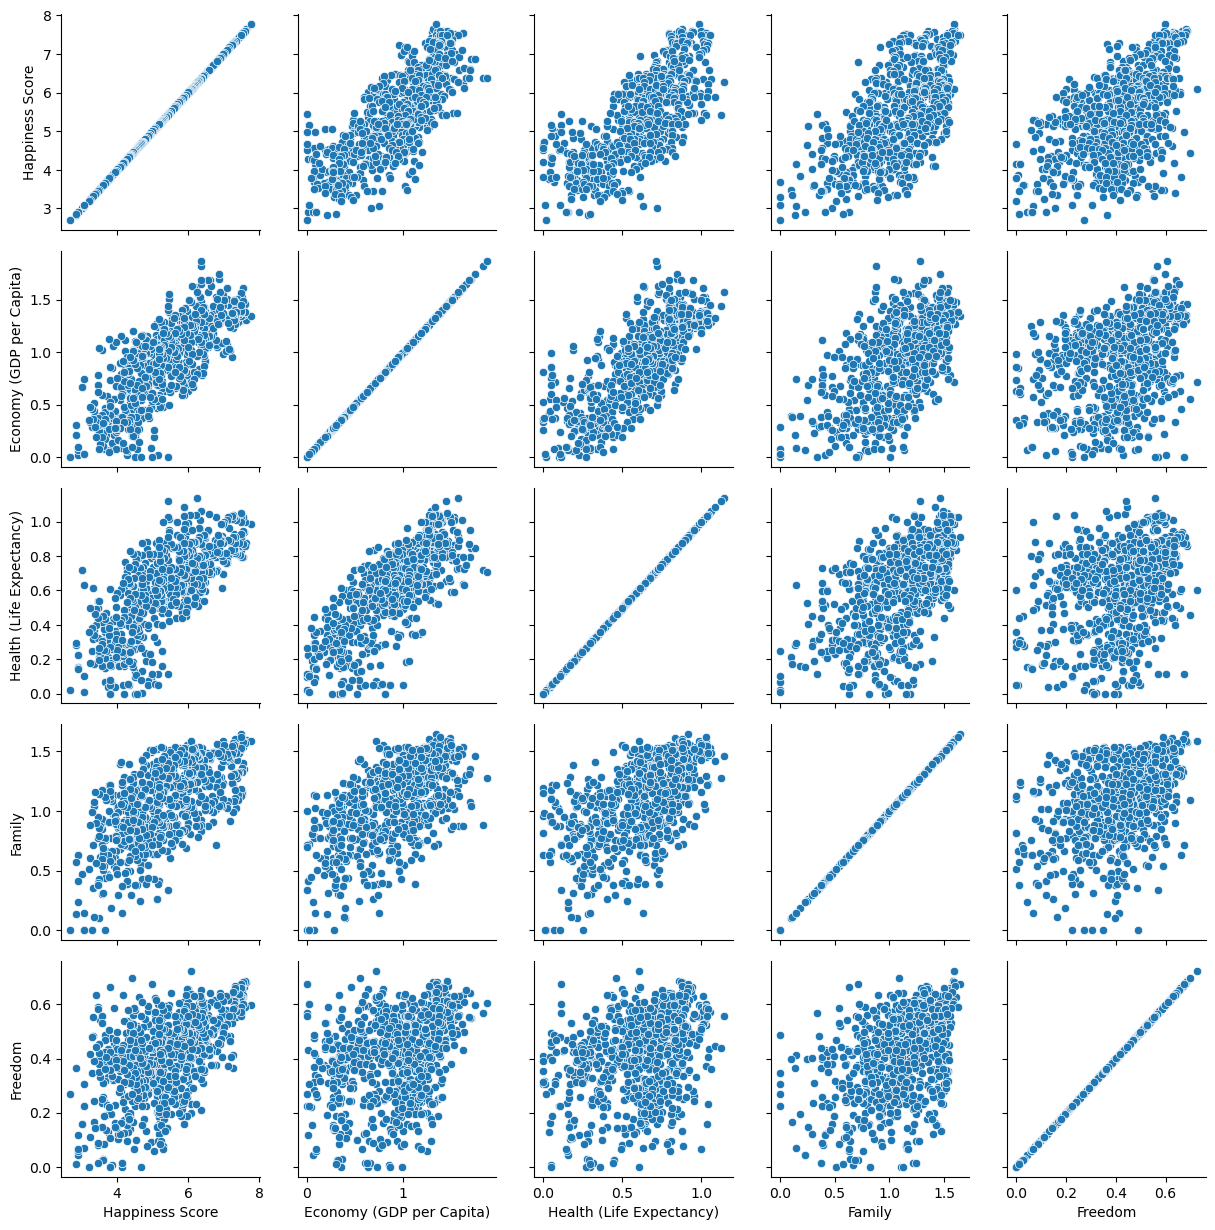

In [5]:
# creating a grid of scatterplots
grid = sns.PairGrid(sub_2)
grid.map(sns.scatterplot)
plt.show()

Text(0.5, 1.0, 'Economy x Family')

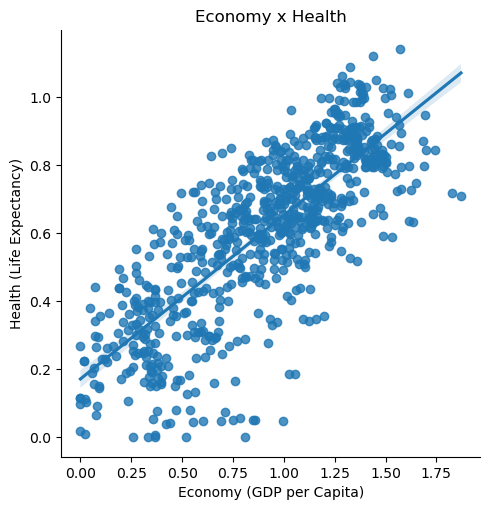

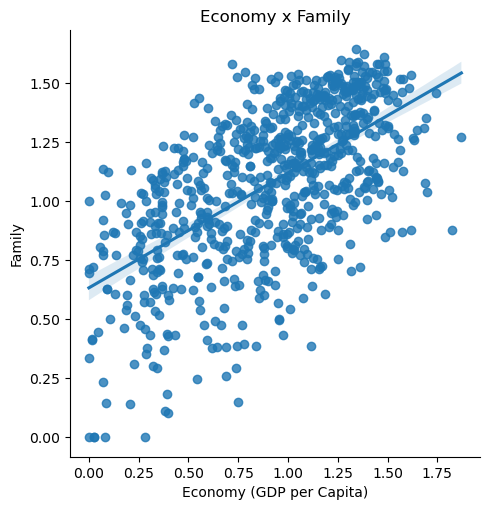

In [41]:
#creating scatterplots for variables with the strongest correlations to Economy:

sns.lmplot(x = "Economy (GDP per Capita)", y = "Health (Life Expectancy)", data = sub)
plt.title("Economy x Health")

sns.lmplot(x = "Economy (GDP per Capita)", y = "Family", data = sub)
plt.title("Economy x Family")

The Economy x Health shows a stark upward trend of data points. 
Most of the time, a better rated Economy also comes with better Health options for its residents.

For Economy x Family, the positive trend is not as striking as the one for Economy x Health.
A highly rated Economy does not necessarily mean a strong Family support rating, although the majority of the data points do gather at the top right quarter.

Text(0.5, 1.0, 'Family x Health')

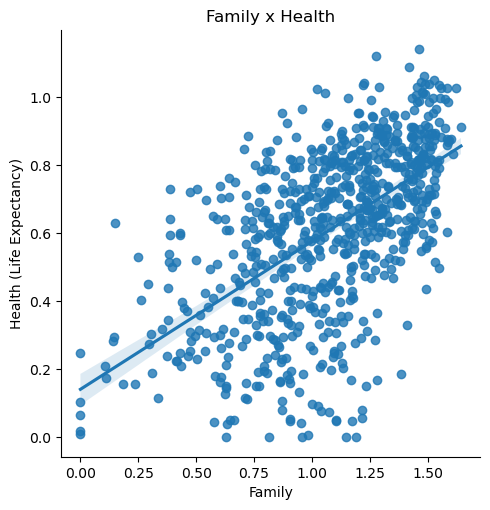

In [42]:
#creating scatterplot for variable with the strongest correlation to Family:

sns.lmplot(x = "Family", y = "Health (Life Expectancy)", data = sub)
plt.title("Family x Health")

The data points mostly center around the top right quarter, whereas there is a lot of variance elsewhere. This suggests a highly Family-rated country would often also have a high Health score.

# 04. Pairplot

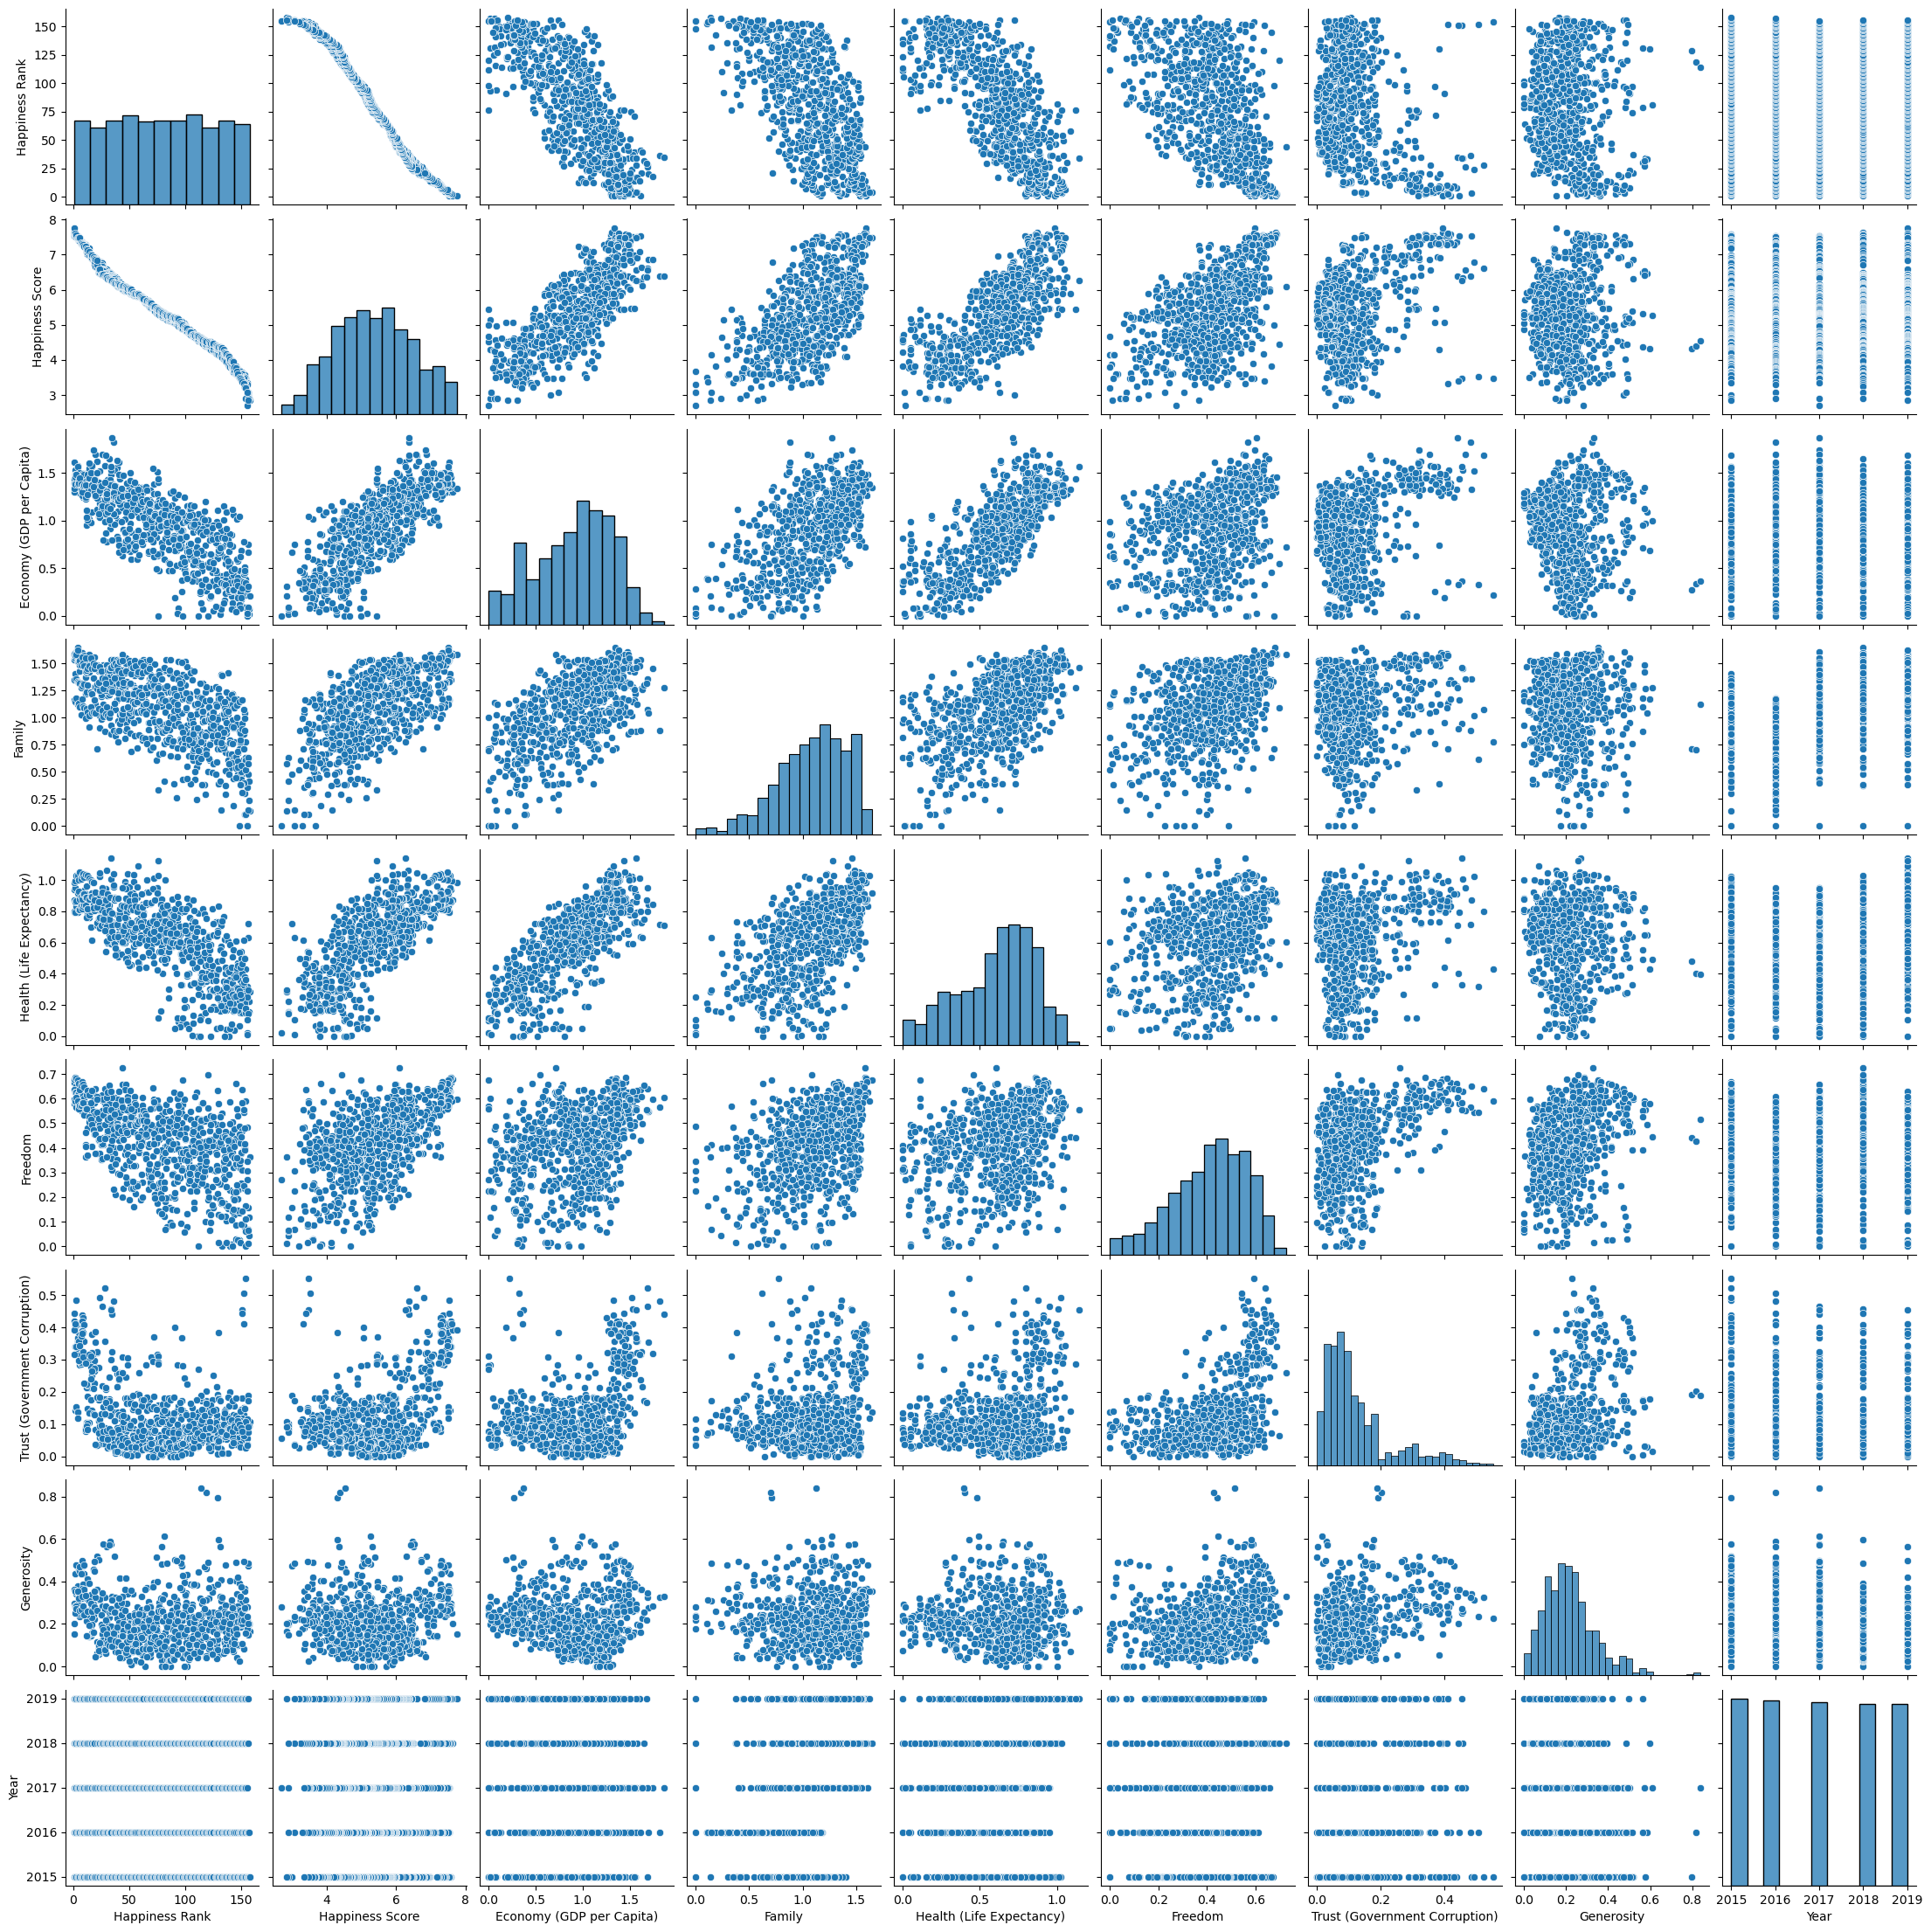

In [43]:
g = sns.pairplot(sub)

Looking at this pairplot, it is striking that the strongest correlations exist between Happiness score, Economy, Health and Family.

Since the values in the Year column are distinct, the plots look very structured.

The Happiness score shows a normal distribution. Economy is also normally distributed with a slight skew to the left. 

Family, Health and Freedom have a left skewed distribution, whereas Trust and Generosity are distributed right-skewedly.

# 05. Catplot

<Axes: xlabel='Happiness Score', ylabel='Count'>

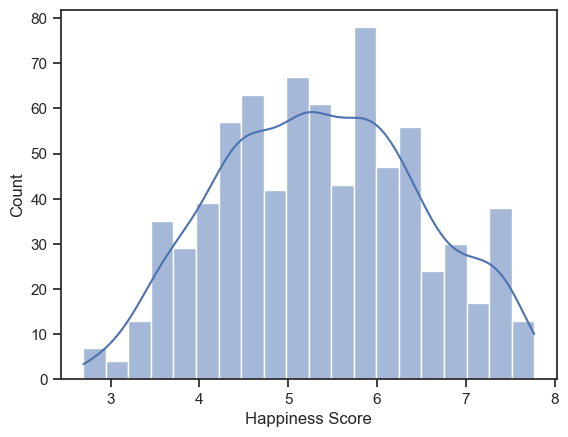

In [53]:
# creating a derivation to produce a hue for the categorical plot
sns.histplot(df["Happiness Score"], bins = 20, kde = True)

In [60]:
df.loc[df["Happiness Score"] < 4.2, "Happiness rating"] = "below average"

In [61]:
df.loc[(df["Happiness Score"] >= 4.2) & (df["Happiness Score"] < 6.3), "Happiness rating"] = "average"

In [62]:
df.loc[df["Happiness Score"] >= 6.3, "Happiness rating"] = "above average"

Text(0.5, 1.0, 'Happiness Score per Region')

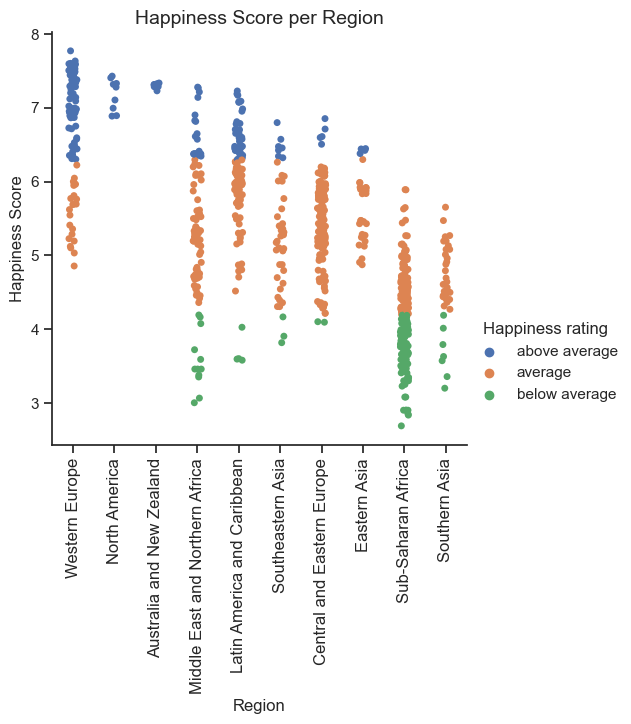

In [63]:
# creating the categorical plot
sns.set(style = "ticks")
g = sns.catplot (x = "Region", y = "Happiness Score", hue = "Happiness rating", data = df)
plt.xticks(fontsize = 12, rotation = 90)
plt.title("Happiness Score per Region", fontsize = 14)

As we can see, North America, Australia and New Zealand are the highest rated regions for happiness. Western Europe is split between average and above average nations.

While the Middle East and Northern Africa have a span of every Happiness rating, the Sub-Saharan African region does not show any counts above average Happiness, making it the region with the highest counts of below average Happiness nations as well.


# 06. Answers 6.1

### Questions that can be answered:

- Is the answer to happiness related to a combination of the six life factors?

--> The EDA shows a strong positive correlation to the factors Economy, Health, Family and Freedom.

- Where is the epicenter of happiness globally?

--> Happiness is mainly centered in Oceania, North America, Western Europe and Eastern Asia.

### New questions:
- Is there an indirect correlation between Generosity and any other factor or even Happiness score? 
- How is Generosity linked to Year?

# 07. Hypotheses

- If the Economy is poorly rated, then the Happiness Score is likely to be low as well.
- If at least 2 of the factors Economy, Health, Family and Freedom are highly rated, the country in question is more likely to be above average in terms of Happiness score.
- If compared to 2015, more countries will be shifting into higher Happiness ratings due to the advancement of health systems, social support and international collaboration.